Problem statement

Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.


Import files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


Read data

In [2]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Train_SU63ISt%20-%20Train_SU63ISt.csv',index_col=[1], parse_dates=[1])
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Test_0qrQsBZ%20-%20Test_0qrQsBZ.csv',index_col=[1], parse_dates=[1])
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/sample_submission_LSeus50%20-%20sample_submission_LSeus50.csv')

In [3]:
train

ID  Count
Datetime                         
2012-08-25 00:00:00      0      8
2012-08-25 01:00:00      1      2
2012-08-25 02:00:00      2      6
2012-08-25 03:00:00      3      2
2012-08-25 04:00:00      4      2
...                    ...    ...
2014-09-25 19:00:00  18283    868
2014-09-25 20:00:00  18284    732
2014-09-25 21:00:00  18285    702
2014-09-25 22:00:00  18286    580
2014-09-25 23:00:00  18287    534

[18288 rows x 2 columns]

In [4]:
test

ID
Datetime                  
2014-09-26 00:00:00  18288
2014-09-26 01:00:00  18289
2014-09-26 02:00:00  18290
2014-09-26 03:00:00  18291
2014-09-26 04:00:00  18292
...                    ...
2015-04-26 19:00:00  23395
2015-04-26 20:00:00  23396
2015-04-26 21:00:00  23397
2015-04-26 22:00:00  23398
2015-04-26 23:00:00  23399

[5112 rows x 1 columns]

In [5]:
sample

ID  Count
0     18288      0
1     18289      0
2     18290      0
3     18291      0
4     18292      0
...     ...    ...
5107  23395      0
5108  23396      0
5109  23397      0
5110  23398      0
5111  23399      0

[5112 rows x 2 columns]

Add weekday to dataframes

In [6]:
train['dayofweek'] = train.index.dayofweek
test['dayofweek'] = test.index.dayofweek

In [7]:
train

ID  Count  dayofweek
Datetime                                    
2012-08-25 00:00:00      0      8          5
2012-08-25 01:00:00      1      2          5
2012-08-25 02:00:00      2      6          5
2012-08-25 03:00:00      3      2          5
2012-08-25 04:00:00      4      2          5
...                    ...    ...        ...
2014-09-25 19:00:00  18283    868          3
2014-09-25 20:00:00  18284    732          3
2014-09-25 21:00:00  18285    702          3
2014-09-25 22:00:00  18286    580          3
2014-09-25 23:00:00  18287    534          3

[18288 rows x 3 columns]

In [8]:
test

ID  dayofweek
Datetime                             
2014-09-26 00:00:00  18288          4
2014-09-26 01:00:00  18289          4
2014-09-26 02:00:00  18290          4
2014-09-26 03:00:00  18291          4
2014-09-26 04:00:00  18292          4
...                    ...        ...
2015-04-26 19:00:00  23395          6
2015-04-26 20:00:00  23396          6
2015-04-26 21:00:00  23397          6
2015-04-26 22:00:00  23398          6
2015-04-26 23:00:00  23399          6

[5112 rows x 2 columns]

Create datetime column

In [9]:
train['ds'] = train.index
test['ds'] = test.index

Rename columns

In [10]:
train.rename(columns={'Count':'y', 'dayofweek': 'add1'}, inplace=True)
test.rename(columns={'Count':'y', 'dayofweek': 'add1'}, inplace=True)

In [11]:
train

ID    y  add1                  ds
Datetime                                                 
2012-08-25 00:00:00      0    8     5 2012-08-25 00:00:00
2012-08-25 01:00:00      1    2     5 2012-08-25 01:00:00
2012-08-25 02:00:00      2    6     5 2012-08-25 02:00:00
2012-08-25 03:00:00      3    2     5 2012-08-25 03:00:00
2012-08-25 04:00:00      4    2     5 2012-08-25 04:00:00
...                    ...  ...   ...                 ...
2014-09-25 19:00:00  18283  868     3 2014-09-25 19:00:00
2014-09-25 20:00:00  18284  732     3 2014-09-25 20:00:00
2014-09-25 21:00:00  18285  702     3 2014-09-25 21:00:00
2014-09-25 22:00:00  18286  580     3 2014-09-25 22:00:00
2014-09-25 23:00:00  18287  534     3 2014-09-25 23:00:00

[18288 rows x 4 columns]

In [12]:
test

ID  add1                  ds
Datetime                                            
2014-09-26 00:00:00  18288     4 2014-09-26 00:00:00
2014-09-26 01:00:00  18289     4 2014-09-26 01:00:00
2014-09-26 02:00:00  18290     4 2014-09-26 02:00:00
2014-09-26 03:00:00  18291     4 2014-09-26 03:00:00
2014-09-26 04:00:00  18292     4 2014-09-26 04:00:00
...                    ...   ...                 ...
2015-04-26 19:00:00  23395     6 2015-04-26 19:00:00
2015-04-26 20:00:00  23396     6 2015-04-26 20:00:00
2015-04-26 21:00:00  23397     6 2015-04-26 21:00:00
2015-04-26 22:00:00  23398     6 2015-04-26 22:00:00
2015-04-26 23:00:00  23399     6 2015-04-26 23:00:00

[5112 rows x 3 columns]

In [13]:
ID_train = train.ID
ID_test = test.ID

train.drop(['ID'], axis = 1)
test.drop(['ID'], axis = 1)

add1                  ds
Datetime                                     
2014-09-26 00:00:00     4 2014-09-26 00:00:00
2014-09-26 01:00:00     4 2014-09-26 01:00:00
2014-09-26 02:00:00     4 2014-09-26 02:00:00
2014-09-26 03:00:00     4 2014-09-26 03:00:00
2014-09-26 04:00:00     4 2014-09-26 04:00:00
...                   ...                 ...
2015-04-26 19:00:00     6 2015-04-26 19:00:00
2015-04-26 20:00:00     6 2015-04-26 20:00:00
2015-04-26 21:00:00     6 2015-04-26 21:00:00
2015-04-26 22:00:00     6 2015-04-26 22:00:00
2015-04-26 23:00:00     6 2015-04-26 23:00:00

[5112 rows x 2 columns]

In [14]:
train

ID    y  add1                  ds
Datetime                                                 
2012-08-25 00:00:00      0    8     5 2012-08-25 00:00:00
2012-08-25 01:00:00      1    2     5 2012-08-25 01:00:00
2012-08-25 02:00:00      2    6     5 2012-08-25 02:00:00
2012-08-25 03:00:00      3    2     5 2012-08-25 03:00:00
2012-08-25 04:00:00      4    2     5 2012-08-25 04:00:00
...                    ...  ...   ...                 ...
2014-09-25 19:00:00  18283  868     3 2014-09-25 19:00:00
2014-09-25 20:00:00  18284  732     3 2014-09-25 20:00:00
2014-09-25 21:00:00  18285  702     3 2014-09-25 21:00:00
2014-09-25 22:00:00  18286  580     3 2014-09-25 22:00:00
2014-09-25 23:00:00  18287  534     3 2014-09-25 23:00:00

[18288 rows x 4 columns]

In [15]:
test

ID  add1                  ds
Datetime                                            
2014-09-26 00:00:00  18288     4 2014-09-26 00:00:00
2014-09-26 01:00:00  18289     4 2014-09-26 01:00:00
2014-09-26 02:00:00  18290     4 2014-09-26 02:00:00
2014-09-26 03:00:00  18291     4 2014-09-26 03:00:00
2014-09-26 04:00:00  18292     4 2014-09-26 04:00:00
...                    ...   ...                 ...
2015-04-26 19:00:00  23395     6 2015-04-26 19:00:00
2015-04-26 20:00:00  23396     6 2015-04-26 20:00:00
2015-04-26 21:00:00  23397     6 2015-04-26 21:00:00
2015-04-26 22:00:00  23398     6 2015-04-26 22:00:00
2015-04-26 23:00:00  23399     6 2015-04-26 23:00:00

[5112 rows x 3 columns]

Graph data

Text(0, 0.5, 'y')

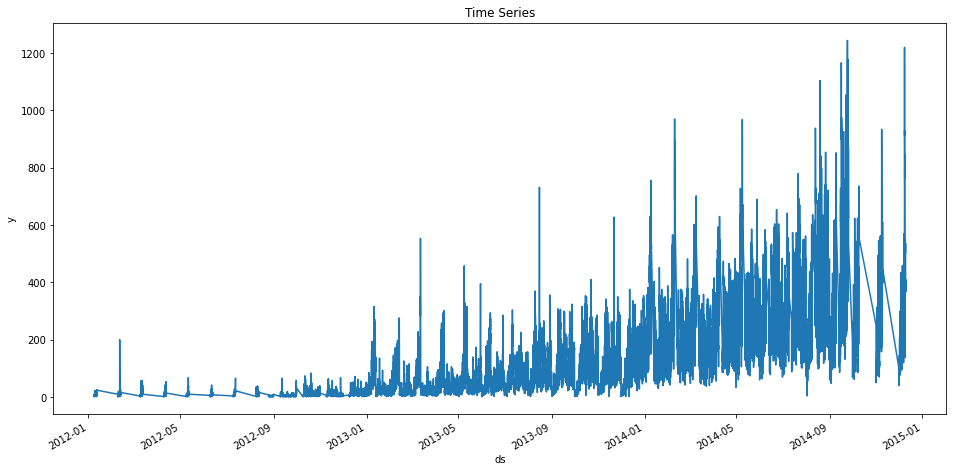

In [16]:
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y") 

Split training set

In [17]:
ID_train = train.ID
ID_test = test.ID

split_date = '09-01-2014'

j_train = train[train.ds <= split_date].copy()
j_val = train[train.ds > split_date].copy()
j_test = test.copy()

In [18]:
j_train = j_train.drop(['ID'], axis=1)
j_val = j_val.drop(['ID'], axis=1)
j_test = j_test.drop(['ID'], axis=1)

In [19]:
j_train

y  add1                  ds
Datetime                                          
2012-08-25 00:00:00    8     5 2012-08-25 00:00:00
2012-08-25 01:00:00    2     5 2012-08-25 01:00:00
2012-08-25 02:00:00    6     5 2012-08-25 02:00:00
2012-08-25 03:00:00    2     5 2012-08-25 03:00:00
2012-08-25 04:00:00    2     5 2012-08-25 04:00:00
...                  ...   ...                 ...
2014-08-09 19:00:00  636     5 2014-08-09 19:00:00
2014-08-09 20:00:00  608     5 2014-08-09 20:00:00
2014-08-09 21:00:00  560     5 2014-08-09 21:00:00
2014-08-09 22:00:00  508     5 2014-08-09 22:00:00
2014-08-09 23:00:00  438     5 2014-08-09 23:00:00

[17113 rows x 3 columns]

In [20]:
j_val

y  add1                  ds
Datetime                                          
2014-09-01 01:00:00  160     0 2014-09-01 01:00:00
2014-09-01 02:00:00  122     0 2014-09-01 02:00:00
2014-09-01 03:00:00   84     0 2014-09-01 03:00:00
2014-09-01 04:00:00   60     0 2014-09-01 04:00:00
2014-09-01 05:00:00   78     0 2014-09-01 05:00:00
...                  ...   ...                 ...
2014-09-25 19:00:00  868     3 2014-09-25 19:00:00
2014-09-25 20:00:00  732     3 2014-09-25 20:00:00
2014-09-25 21:00:00  702     3 2014-09-25 21:00:00
2014-09-25 22:00:00  580     3 2014-09-25 22:00:00
2014-09-25 23:00:00  534     3 2014-09-25 23:00:00

[1175 rows x 3 columns]

In [21]:
j_test

add1                  ds
Datetime                                     
2014-09-26 00:00:00     4 2014-09-26 00:00:00
2014-09-26 01:00:00     4 2014-09-26 01:00:00
2014-09-26 02:00:00     4 2014-09-26 02:00:00
2014-09-26 03:00:00     4 2014-09-26 03:00:00
2014-09-26 04:00:00     4 2014-09-26 04:00:00
...                   ...                 ...
2015-04-26 19:00:00     6 2015-04-26 19:00:00
2015-04-26 20:00:00     6 2015-04-26 20:00:00
2015-04-26 21:00:00     6 2015-04-26 21:00:00
2015-04-26 22:00:00     6 2015-04-26 22:00:00
2015-04-26 23:00:00     6 2015-04-26 23:00:00

[5112 rows x 2 columns]

FB Prophet

In [22]:
from fbprophet import Prophet

m = Prophet()
m.add_regressor('add1')
m.fit(j_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Forecast on validation set

In [23]:
forecast = m.predict(j_val.drop(columns="y"))
forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0    2014-09-01 01:00:00  387.920686  ...                         0.0  377.566987
1    2014-09-01 02:00:00  387.966073  ...                         0.0  358.326366
2    2014-09-01 03:00:00  388.011460  ...                         0.0  343.405342
3    2014-09-01 04:00:00  388.056848  ...                         0.0  334.349191
4    2014-09-01 05:00:00  388.102235  ...                         0.0  330.305646
...                  ...         ...  ...                         ...         ...
1170 2014-12-09 19:00:00  496.578142  ...                         0.0  513.956899
1171 2014-12-09 20:00:00  496.623530  ...                         0.0  510.842619
1172 2014-12-09 21:00:00  496.668917  ...                         0.0  508.402454
1173 2014-12-09 22:00:00  496.714305  ...                         0.0  505.552869
1174 2014-12-09 23:00:00  496.759692  ...                         0.0  498.321904

[1175 rows x 28 columns]

In [24]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(j_val['y'], forecast['yhat'])) 
print(rms)

200.07312625643146


In [25]:
df_val=pd.DataFrame({'actual': j_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

actual  predicted
0        160        377
1        122        358
2         84        343
3         60        334
4         78        330
...      ...        ...
1170     868        513
1171     732        510
1172     702        508
1173     580        505
1174     534        498

[1175 rows x 2 columns]

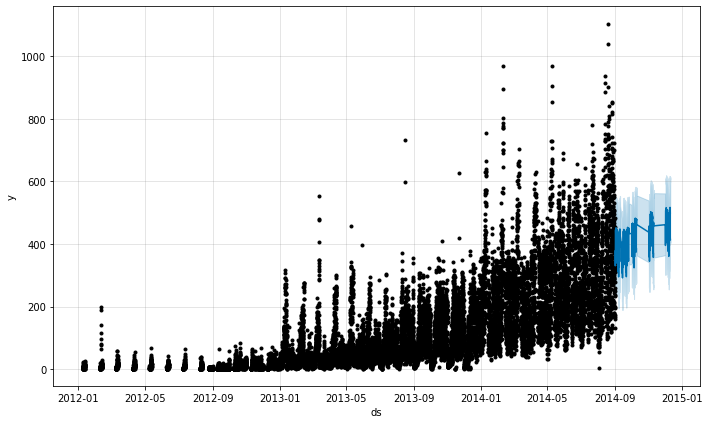

In [26]:
fig1 = m.plot(forecast)

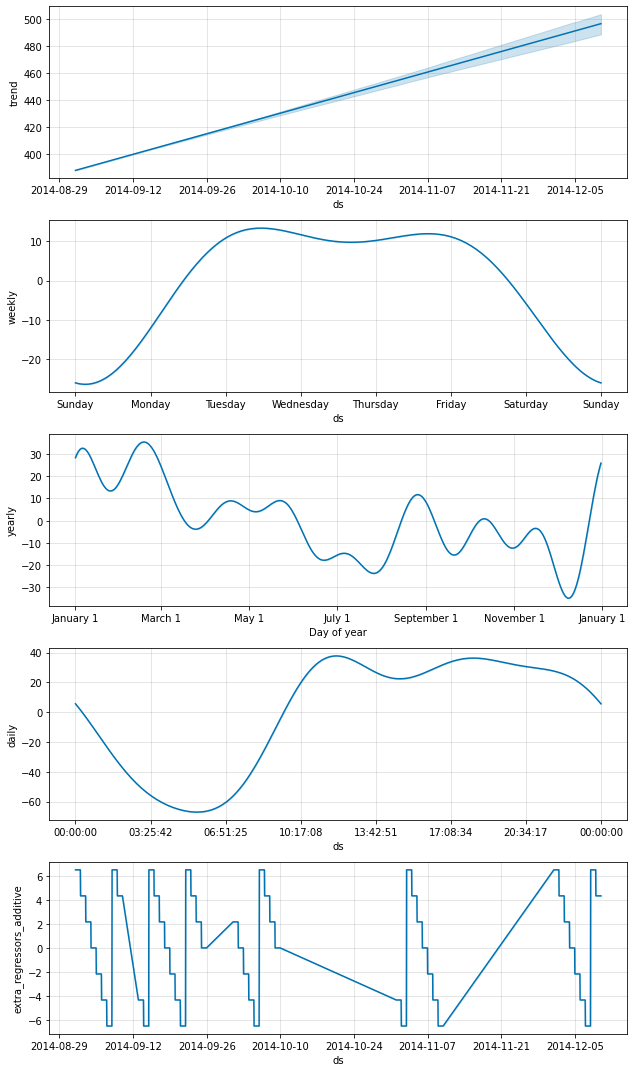

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [29]:
plot_components_plotly(m, forecast)

Forecast on test set

In [30]:
forecast = m.predict(j_test)
forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0    2014-01-10 00:00:00  166.962756  ...                         0.0  212.200542
1    2014-01-10 01:00:00  166.989604  ...                         0.0  192.016755
2    2014-01-10 02:00:00  167.016451  ...                         0.0  171.301732
3    2014-01-10 03:00:00  167.043299  ...                         0.0  154.859128
4    2014-01-10 04:00:00  167.070147  ...                         0.0  144.237851
...                  ...         ...  ...                         ...         ...
5107 2015-12-04 19:00:00  888.725355  ...                         0.0  889.383246
5108 2015-12-04 20:00:00  888.770743  ...                         0.0  885.369975
5109 2015-12-04 21:00:00  888.816130  ...                         0.0  882.014220
5110 2015-12-04 22:00:00  888.861517  ...                         0.0  878.232947
5111 2015-12-04 23:00:00  888.906905  ...                         0.0  870.054976

[5112 rows x 28 columns]

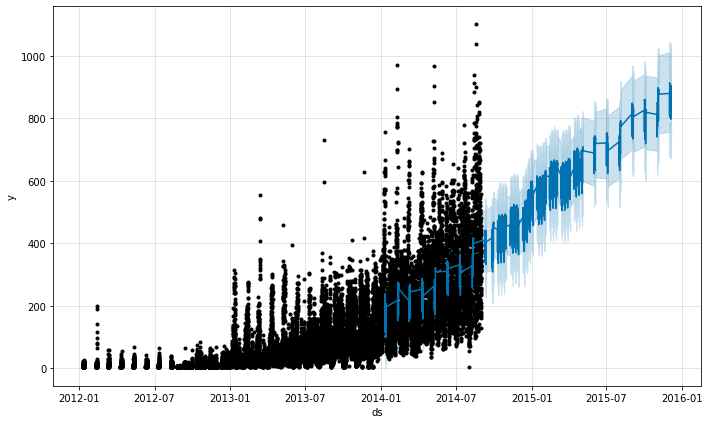

In [31]:
fig1 = m.plot(forecast)

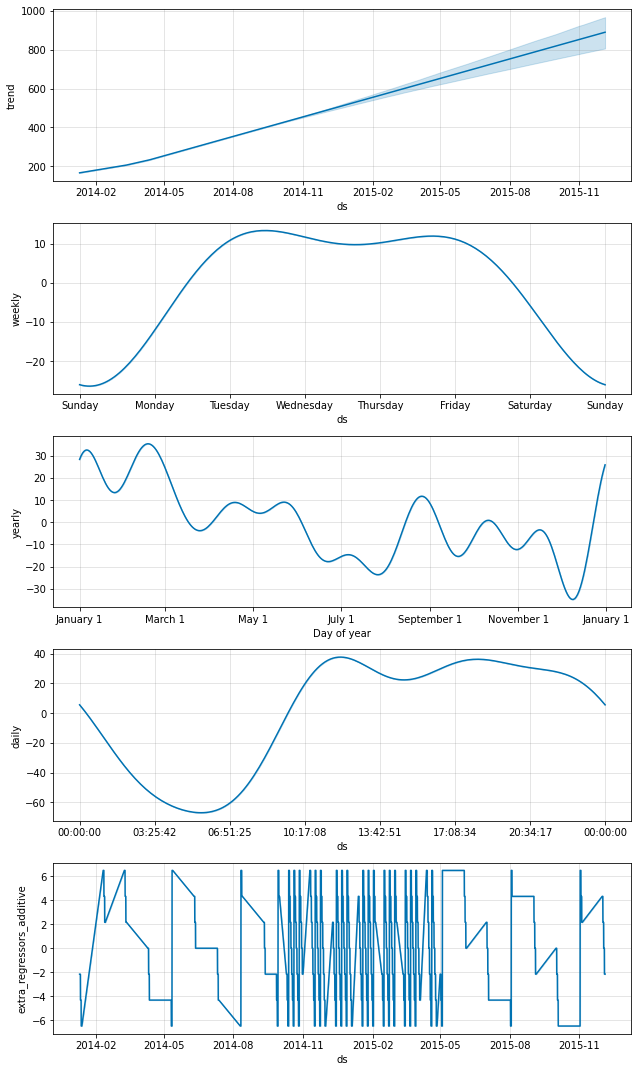

In [32]:
fig2 = m.plot_components(forecast)

In [33]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [34]:
plot_components_plotly(m, forecast)

Prepare submission

In [35]:
submission = pd.DataFrame({'ID': ID_test.values, 'Count': forecast.yhat.values})

In [36]:
# Converting the final submission to csv format 
submission.to_csv('submission.csv',index=False)
submission = pd.read_csv("submission.csv")
submission

ID       Count
0     18288  212.200542
1     18289  192.016755
2     18290  171.301732
3     18291  154.859128
4     18292  144.237851
...     ...         ...
5107  23395  889.383246
5108  23396  885.369975
5109  23397  882.014220
5110  23398  878.232947
5111  23399  870.054976

[5112 rows x 2 columns]